In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv( 'https://query.data.world/s/wh6j7rxy2hvrn4ml75ci62apk5hgae' ) 


URLError: <urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>

In [ ]:
df.to_csv( 'data.csv', index = False)

In [ ]:
df

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
0,Armenia,1992,1,AreaPerCap,1.402924e-01,1.995463e-01,0.097188051,3.688847e-02,2.931995e-02,0.000000e+00,5.032351e-01,3A
1,Armenia,1992,1,AreaTotHA,4.830000e+05,6.870000e+05,334600,1.270000e+05,1.009430e+05,0.000000e+00,1.732543e+06,3A
2,Armenia,1992,1,BiocapPerCap,1.598044e-01,1.352610e-01,0.084003213,1.374213e-02,3.339780e-02,0.000000e+00,4.262086e-01,3A
3,Armenia,1992,1,BiocapTotGHA,5.501762e+05,4.656780e+05,289207.1078,4.731155e+04,1.149823e+05,0.000000e+00,1.467355e+06,3A
4,Armenia,1992,1,EFConsPerCap,3.875102e-01,1.894622e-01,1.26E-06,4.164833e-03,3.339780e-02,1.114093e+00,1.728629e+00,3A
...,...,...,...,...,...,...,...,...,...,...,...,...
72181,World,2016,5001,BiocapTotGHA,3.984702e+09,1.504757e+09,5111762779.0,1.095445e+09,4.726163e+08,0.000000e+00,1.216928e+10,3A
72182,World,2016,5001,EFConsPerCap,5.336445e-01,1.402092e-01,0.273495,8.974253e-02,6.329435e-02,1.646235e+00,2.746619e+00,3A
72183,World,2016,5001,EFConsTotGHA,3.984702e+09,1.046937e+09,2042179333.0,6.701039e+08,4.726163e+08,1.229237e+10,2.050891e+10,3A
72184,World,2016,5001,EFProdPerCap,5.336445e-01,1.402092e-01,0.273495,8.974253e-02,6.329435e-02,1.646235e+00,2.746619e+00,3A


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72186 entries, 0 to 72185
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         72186 non-null  object 
 1   year            72186 non-null  int64  
 2   country_code    72186 non-null  int64  
 3   record          72186 non-null  object 
 4   crop_land       51714 non-null  float64
 5   grazing_land    51714 non-null  float64
 6   forest_land     51714 non-null  object 
 7   fishing_ground  51713 non-null  float64
 8   built_up_land   51713 non-null  float64
 9   carbon          51713 non-null  float64
 10  total           72177 non-null  float64
 11  QScore          72185 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 6.6+ MB


<AxesSubplot:>

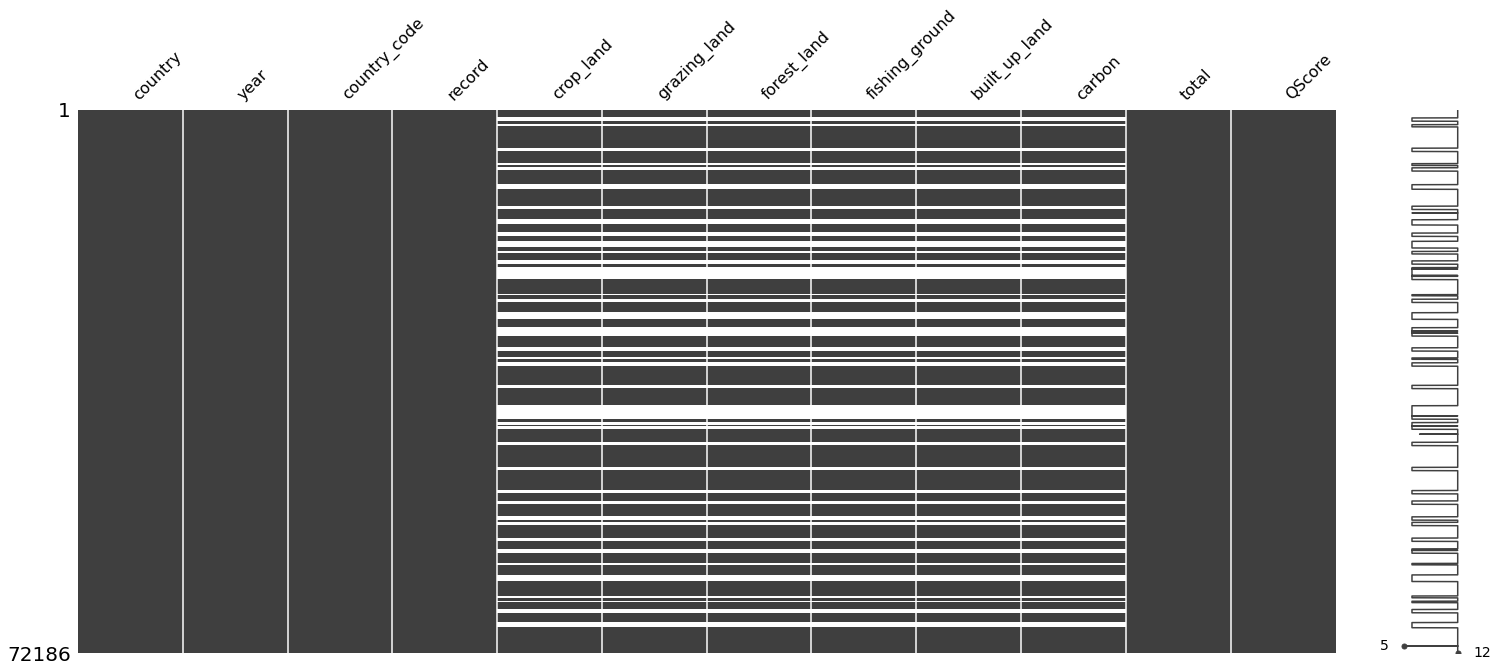

In [ ]:
import missingno as msno
msno.matrix(df)


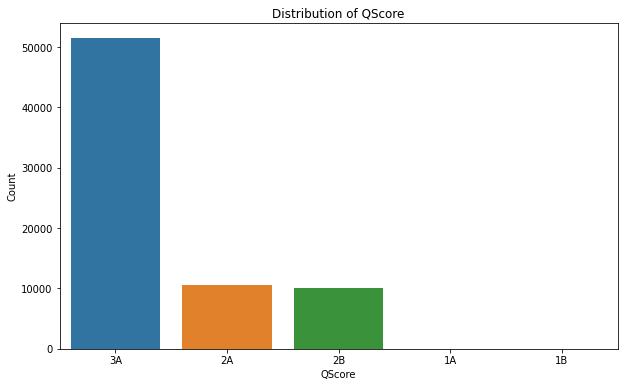

In [ ]:
# plot the distribution of the QScore

plt.figure(figsize=(10,6))
sns.countplot(x = df['QScore'])
plt.title('Distribution of QScore')
plt.xlabel('QScore')
plt.ylabel('Count')
plt.show()


In [ ]:
df = df.dropna()

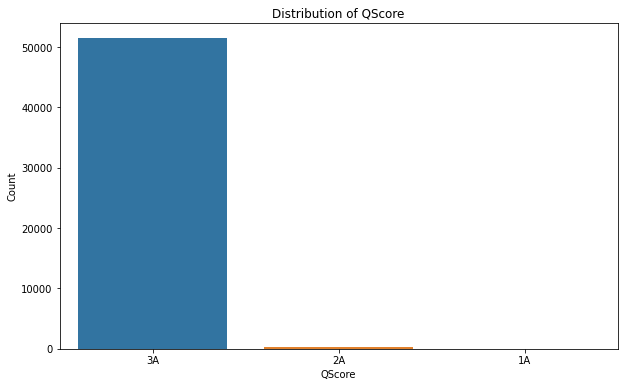

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['QScore'])
plt.title('Distribution of QScore')
plt.xlabel('QScore')
plt.ylabel('Count')
plt.show()


In [ ]:
df['QScore'] = df['QScore'].replace(['1A'],'2A')

C:\Users\NDUKWE\AppData\Local\Temp\ipykernel_22764\4146100507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['QScore'] = df['QScore'].replace(['1A'],'2A')


In [ ]:
df['QScore'].value_counts()

3A    51473
2A      240
Name: QScore, dtype: int64

In [ ]:
df_2A = df[df['QScore'] == '2A']
df_3A = df[df['QScore'] == '3A'].sample(350)

data_df = df_2A.append(df_3A)

C:\Users\NDUKWE\AppData\Local\Temp\ipykernel_22764\437003580.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = df_2A.append(df_3A)


In [ ]:
import sklearn.utils
data_df = sklearn.utils.shuffle(data_df)
data_df = data_df.reset_index(drop= True)


In [ ]:
data_df

,index,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
0,147,Yemen,1979,249,EFProdPerCap,1.888264e-01,2.740625e-01,0.006499,5.676610e-02,2.878527e-02,1.283463e-01,6.832859e-01,3A
1,294,Tajikistan,2016,208,BiocapPerCap,2.829950e-01,1.286783e-01,0.005977424,1.095266e-02,9.446197e-02,0.000000e+00,5.230654e-01,2A
2,377,Eritrea,2000,178,EFConsTotGHA,7.913399e+05,1.167536e+06,902328.2959,1.779916e+05,9.627028e+04,2.044483e+05,3.339915e+06,3A
3,45,"Iran, Islamic Republic of",2016,102,BiocapTotGHA,2.775975e+07,5.488762e+06,4761750.538,1.503345e+07,5.617959e+06,0.000000e+00,5.866167e+07,2A
4,55,"Congo, Democratic Republic of",2012,250,EFConsTotGHA,1.030235e+07,8.902281e+05,33693987.61,9.882374e+05,3.509490e+06,4.638432e+06,5.402272e+07,3A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,196,Norway,2013,162,BiocapPerCap,2.218410e-01,6.001838e-01,3.556983158,3.018169e+00,4.244173e-02,0.000000e+00,7.439618e+00,3A
586,82,Ireland,2016,104,EFProdTotGHA,2.711247e+06,3.495762e+06,2043988.658,1.800284e+06,4.632982e+05,1.318268e+07,2.369726e+07,2A
587,564,Poland,1969,173,BiocapPerCap,1.014353e+00,8.819435e-02,0.881914736,1.308412e-01,6.033619e-02,0.000000e+00,2.175640e+00,3A
588,110,Togo,2000,217,BiocapTotGHA,1.458794e+06,8.046501e+05,373757.5475,1.451529e+05,7.820911e+04,0.000000e+00,2.860564e+06,3A


In [ ]:
data_df['QScore'].value_counts()

3A    350
2A    240
Name: QScore, dtype: int64

In [ ]:
data_df = data_df.drop(columns = ['country_code', 'country','year'])

X = data_df.drop(columns = ['QScore'])
y = data_df['QScore']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
y_train.value_counts()

3A    242
2A    171
Name: QScore, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

x_train.record = encoder.fit_transform(x_train.record) 
x_test.record = encoder.fit_transform(x_test.record) 

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state= 1 ) 
x_train_balanced, y_balanced = smote.fit_resample(x_train, y_train) 

NameError: name 'x_train' is not defined